In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [2]:
def get_feature_gain():
    target = ["generation"]
    features = ['Humidity', 'WindSpeed', 'Temp', 'CloudCover', 'Rain', 'SolarIrradiation', 
                'yearSin', 'yearCos', 'daySin', 'dayCos','monthSin', 'monthCos', 'hourSin', 'hourCos']
    train = pd.read_csv("gs://hiroki_storage/pv/energies/code_energies/train.csv")
    train_x,train_y = train[features],train[target]
    model = RandomForestRegressor(n_estimators=10, random_state=71)
    model.fit(train_x, train_y)
    feature_gain = model.feature_importances_
    feature_gain = pd.DataFrame(feature_gain,index=features,columns=["gain"]).sort_values(ascending=False,by="gain")
    return feature_gain

def two_weeks_loss_plot():
    two_weeks_loss = pd.read_csv("gs://hiroki_storage/pv/energies/code_energies/two_weeks_Loss.csv")
    features_median = two_weeks_loss.median(axis=1)
    features_median.index = [i for i in range(1,15)]

    Total_gain = get_feature_gain().cumsum()
    Total_gain.index = [i for i in range(1,15)]
    fig = plt.figure(figsize=(11,7))
    ax1 = fig.add_subplot(1,1,1)

    ln1 = ax1.boxplot([two_weeks_loss.loc[i] for i in range(14)],showmeans=True,medianprops=dict(color='black', linewidth=1))
    ax1.set_ylim(1.0,7.0)
    ax1.tick_params(labelsize = 15)
    ax1.set_xlabel("Number of features",fontsize=18)
    ax1.set_ylabel("Loss[kW]",fontsize=18)
    ln1 = ax1.plot(features_median,label="Median of Loss",)

    ax2 = ax1.twinx()
    ln2=ax2.plot(Total_gain,color="tomato",label="Total gain")
    ax2.set_ylabel('gain',fontsize=18)
    ax2.tick_params(labelsize = 15)
    handler1, label1 = ax1.get_legend_handles_labels()
    handler2, label2 = ax2.get_legend_handles_labels()
    ax1.legend(handler1 + handler2, label1 + label2, loc=2,fontsize=16)
    ax1.set_title("Number of features, 2-week average Loss in LUBE, and total gain",y=-0.2,fontsize=20)

def two_weeks_mpiw_plot():
    two_weeks_mpiw = pd.read_csv("gs://hiroki_storage/pv/energies/code_energies/two_weeks_MPIW.csv")
    add = pd.read_csv("gs://hiroki_storage/pv/energies/code_energies/quantile_regression.csv")
    add = add[add.PICP==1].groupby("features").mean()["MPIW"]
    
    features_median = two_weeks_mpiw.median(axis=1)
    features_median.index = [i for i in range(1,15)]

    fig = plt.figure(figsize=(11,7))
    plt.boxplot([two_weeks_mpiw.loc[i] for i in range(14)]
                ,showmeans=True,medianprops=dict(color='black', linewidth=1))
    plt.plot(features_median,label="Median MPIW in LUBE")
    plt.plot(add,label="QR")
    plt.ylabel("MPIW[kW]",fontsize=18)
    plt.xlabel("Number of features",fontsize=18)
    plt.tick_params(labelsize = 15)
    plt.legend(fontsize=18)
    plt.title("Number of features and 2-week average MPIW in LUBE and QR",y=-0.2,fontsize=20)
    #fig.savefig("gs://hiroki_storage/pv/energies/code_energies/CRPS/mpiw.png", bbox_inches='tight',pad_inches = 0.05)
    plt.show()
    
def two_weeks_picp_plot():
    two_weeks_PICP = pd.read_csv("gs://hiroki_storage/pv/energies/code_energies/two_weeks_PICP.csv")
    add = pd.read_csv("gs://hiroki_storage/pv/energies/code_energies/quantile_regression.csv")
    add = add.groupby("features").mean()["PICP"]
    features_median = two_weeks_PICP.median(axis=1)
    features_median.index = [i for i in range(1,15)]

    fig = plt.figure(figsize=(11,7))
    plt.boxplot([two_weeks_PICP.loc[i] for i in range(14)]
                ,showmeans=True,medianprops=dict(color='black', linewidth=1))
    plt.plot(features_median,label="Median PICP in LUBE")
    plt.plot(add,label="QR")
    plt.ylabel("PICP",fontsize=18)
    plt.xlabel("Number of features",fontsize=18)
    plt.tick_params(labelsize = 15)
    plt.legend(fontsize=18)
    plt.title("Number of features and 2-week average PICP in LUBE and QR",y=-0.2,fontsize=20)
    #fig.savefig("gs://hiroki_storage/pv/energies/code_energies/CRPS/picp.png", bbox_inches='tight',pad_inches = 0.05)
    plt.show()
    
def two_weeks_crps_plot():
    two_weeks_crps = pd.read_csv("gs://hiroki_storage/pv/energies/code_energies/two_weeks_CRPS.csv")
    #two_weeks_crps = two_weeks_crps/14.7*100
    add = pd.read_csv("gs://hiroki_storage/pv/energies/code_energies/quantile_regression.csv")
    add = add.groupby("features").mean()["crps"]
    #add = add/14.7*100
    
    features_median = two_weeks_crps.median(axis=1)
    features_median.index = [i for i in range(1,15)]

    Total_gain = get_feature_gain().cumsum()
    Total_gain.index = [i for i in range(1,15)]
    fig = plt.figure(figsize=(11,7))
    ax1 = fig.add_subplot(1,1,1)

    ln1 = ax1.boxplot([two_weeks_crps.loc[i] for i in range(14)],showmeans=True,medianprops=dict(color='black', linewidth=1))
    #ax1.set_ylim(2.6,5.4)
    ax1.set_ylim(0.35,0.8)
    ax1.tick_params(labelsize = 15)
    ax1.set_xlabel("Number of features",fontsize=18)
    ax1.set_ylabel("CRPS[kW]",fontsize=18)
    ln1 = ax1.plot(features_median,label="Median CRPS in LUBE",)
    ln3 = ax1.plot(add,label="QR",)

    ax2 = ax1.twinx()
    ln2=ax2.plot(Total_gain,color="tomato",label="Total gain")
    ax2.set_ylabel('gain',fontsize=18)
    ax2.tick_params(labelsize = 15)
    handler1, label1 = ax1.get_legend_handles_labels()
    handler2, label2 = ax2.get_legend_handles_labels()
    ax1.legend(handler1 + handler2, label1 + label2, loc=(0.63,0.68),fontsize=16)
    plt.title("Number of features, 2-week average CRPS in LUBE and QR, and total gain ",y=-0.2,fontsize=20)
    #ax1.set_title("Number of features, 2-week average CRPS, and total gain",y=-0.2,fontsize=20)
    #fig.savefig("gs://hiroki_storage/pv/energies/code_energies/CRPS/crps.png", bbox_inches='tight',pad_inches = 0.05)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


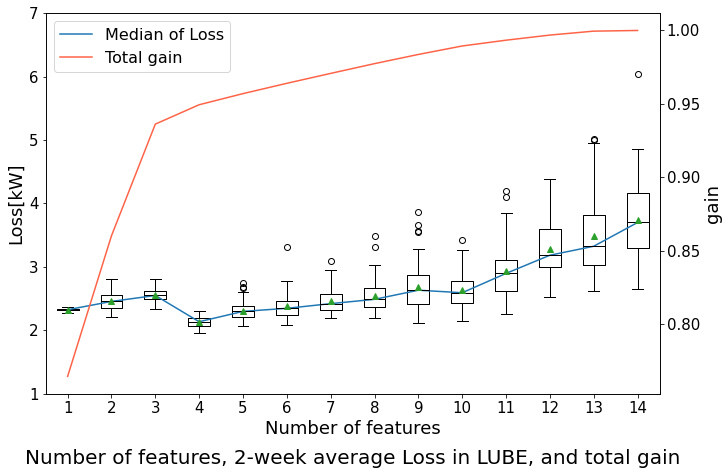

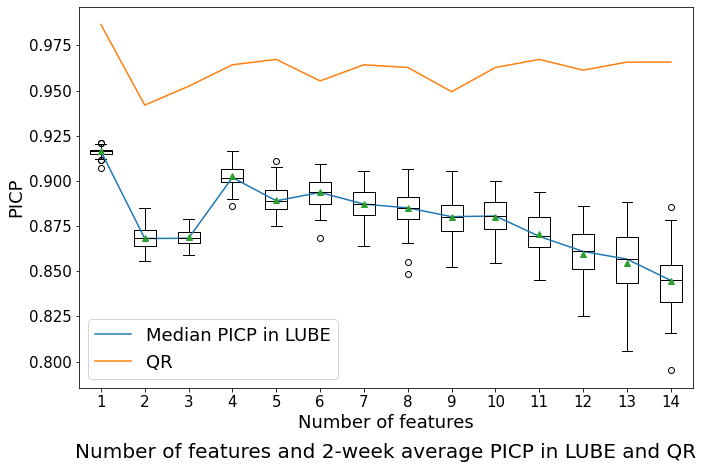

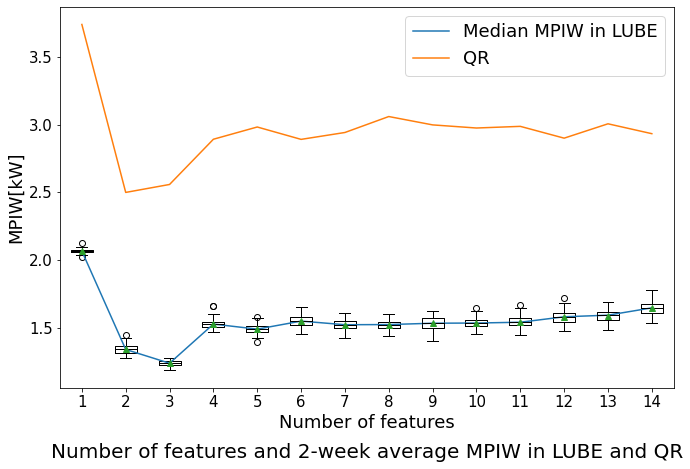

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


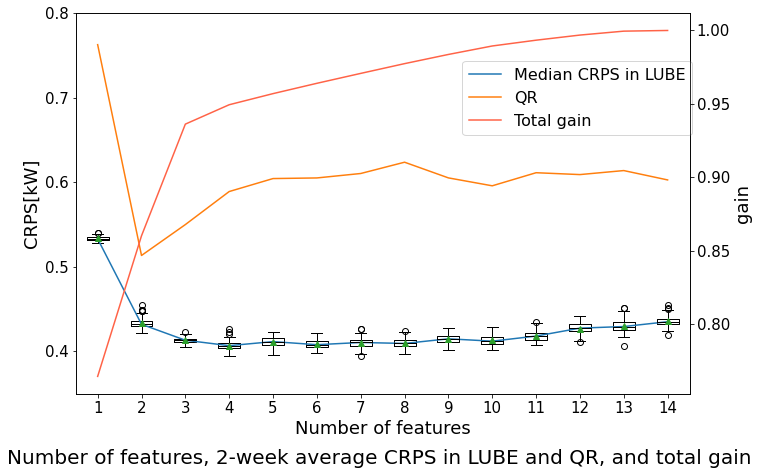

In [3]:
two_weeks_loss_plot()
two_weeks_picp_plot()
two_weeks_mpiw_plot()
two_weeks_crps_plot()

In [4]:
def two_weeks_loss_hist():
    two_weeks_loss = pd.read_csv("gs://hiroki_storage/pv/energies/code_energies/two_weeks_Loss.csv")
    fig=plt.figure(figsize=(11,7))
    bins = np.linspace(two_weeks_loss.min().min(), two_weeks_loss.max().max(), num=75)
    plt.hist(two_weeks_loss.loc[0], alpha = 0.5, label='LUBE(1):Loss',bins= bins)
    plt.hist(two_weeks_loss.loc[3], alpha = 0.5, label='LUBE(4):Loss',bins= bins)
    plt.hist(two_weeks_loss.loc[13], alpha = 0.5, label='LUBE(14):Loss',bins= bins)
    plt.legend(loc='upper right',fontsize=15,borderaxespad=0.1)
    plt.ylabel("Frequency",fontsize=18)
    plt.xlabel("Loss",fontsize=18)
    plt.tick_params(labelsize = 15)
    plt.title("Histograms of 2-week average Loss for LUBE(1), (4), and (14).",y=-0.18,fontsize=20)
    plt.show()
    #fig.savefig("gs://hiroki_storage/pv/energies/code_energies/CRPS/lossist.png", bbox_inches='tight',pad_inches = 0.05)

def two_weeks_picp_hist():
    two_weeks_picp = pd.read_csv("gs://hiroki_storage/pv/energies/code_energies/two_weeks_PICP.csv")
    fig=plt.figure(figsize=(11,7))
    bins = np.linspace(two_weeks_picp.min().min(), two_weeks_picp.max().max(), num=42)
    plt.hist(two_weeks_picp.loc[0], alpha = 0.5, label='LUBE(1):PICP',bins= bins)
    plt.hist(two_weeks_picp.loc[3], alpha = 0.5, label='LUBE(4):PICP',bins= bins)
    plt.hist(two_weeks_picp.loc[13], alpha = 0.5, label='LUBE(14):PICP',bins= bins)
    plt.legend(loc='upper left',fontsize=15,borderaxespad=0.1)
    plt.ylabel("Frequency",fontsize=18)
    plt.xlabel("PICP",fontsize=18)
    plt.tick_params(labelsize = 15)
    plt.title("Histograms of 2-week average PICP for LUBE(1),  (4), and (14).",y=-0.18,fontsize=20)
    plt.show()
    #fig.savefig("gs://hiroki_storage/pv/energies/code_energies/CRPS/picp_Sist.png", bbox_inches='tight',pad_inches = 0.05)
    
def two_weeks_mpiw_hist():
    two_weeks_mpiw = pd.read_csv("gs://hiroki_storage/pv/energies/code_energies/two_weeks_MPIW.csv")
    fig=plt.figure(figsize=(11,7))
    bins = np.linspace(two_weeks_mpiw.min().min(), two_weeks_mpiw.max().max(), num=42)
    plt.hist(two_weeks_mpiw.loc[0], alpha = 0.5, label='LUBE(1):MPIW',bins= bins)
    plt.hist(two_weeks_mpiw.loc[3], alpha = 0.5, label='LUBE(4):MPIW',bins= bins)
    plt.hist(two_weeks_mpiw.loc[13], alpha = 0.5, label='LUBE(14):MPIW',bins= bins)
    plt.legend(loc='upper left',fontsize=15,borderaxespad=0.1)
    plt.ylabel("Frequency",fontsize=18)
    plt.xlabel("MPIW",fontsize=18)
    plt.tick_params(labelsize = 15)
    plt.title("Histograms of 2-week average MPIW for LUBE (1), (4), and (14).",y=-0.18,fontsize=20)
    plt.show()
    #fig.savefig("gs://hiroki_storage/pv/energies/code_energies/CRPS/MPIWist.png", bbox_inches='tight',pad_inches = 0.05)

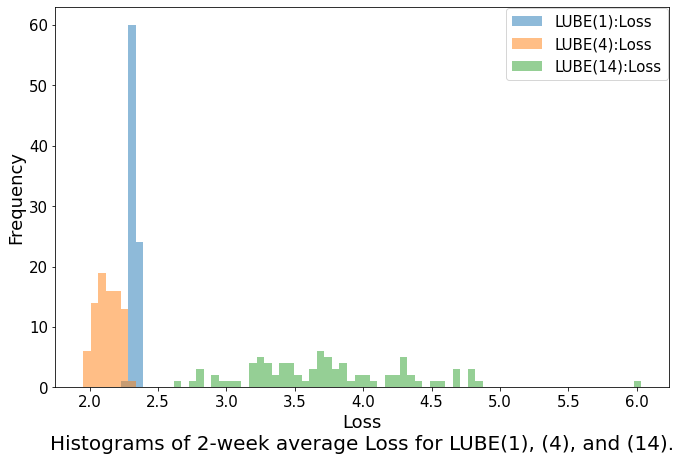

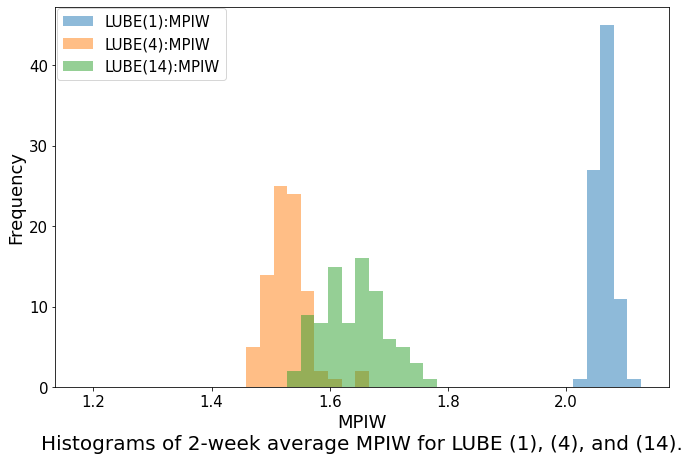

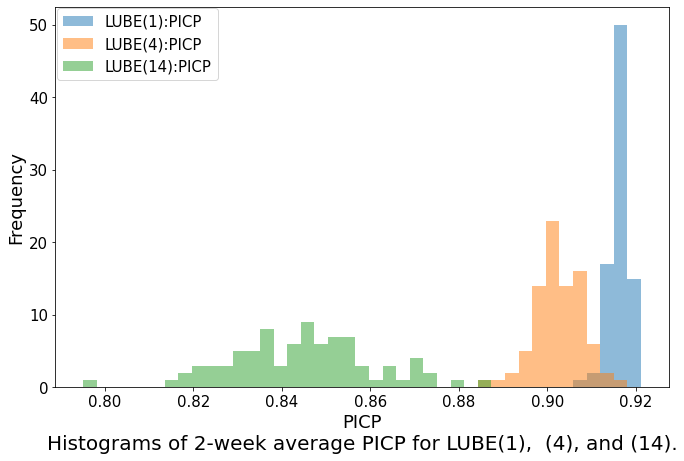

In [5]:
two_weeks_loss_hist()
two_weeks_mpiw_hist()
two_weeks_picp_hist()

In [6]:
def plot_PIs(day):
    fig = plt.figure(figsize=(8,6))
    ax1 = fig.add_subplot(1, 1, 1)

    fe_uplow = np.load("/home/jupyter/energies/fe_uplow.npy",allow_pickle=False)
    fe1_uplow=fe_uplow[14*0:14*1]
    low_1_m=pd.DataFrame(fe1_uplow[day-1][:,1])
    up_1_m=pd.DataFrame(fe1_uplow[day-1][:,0])

    fe4_uplow=fe_uplow[14*3:14*4]
    low_4_m=pd.DataFrame(fe4_uplow[day-1][:,1])
    up_4_m=pd.DataFrame(fe4_uplow[day-1][:,0])

    fe14_uplow=fe_uplow[14*13:14*14]
    low_14_m=pd.DataFrame(fe14_uplow[day-1][:,1])
    up_14_m=pd.DataFrame(fe14_uplow[day-1][:,0])

    Data = pd.read_csv("gs://hiroki_storage/pv/energies/code_energies/test.csv")
    test_y=Data[(Data.month==6)&(Data.day==day)].generation.reset_index(drop=True)
    feature=pd.concat([low_1_m,up_1_m,low_4_m,up_4_m,low_14_m,up_14_m,test_y],axis=1)
    feature.columns=["low1","up1","low4","up4","low14","up14","generation"]
    feature["hour"]=Data.hour.unique()

    add = pd.read_csv("gs://hiroki_storage/pv/energies/code_energies/quantile_regression.csv")
    ax1.plot(feature.hour, add.loc[(add.features==2)&(add.day==day),"lower"], color='green',lw=0.7,label='QR(2)',linestyle="dashed") 
    ax1.plot(feature.hour, add.loc[(add.features==2)&(add.day==day),"upper"], color='green',lw=0.7,linestyle="dashed") 

    ax1.plot(feature.hour, feature.low1, color='red',lw=0.7,label='LUBE(1)',linestyle="dashed") 
    ax1.plot(feature.hour, feature.up1, color='red',lw=0.7,linestyle="dashed") 

    ax1.plot(feature.hour, feature.low4, color='blue',lw=0.7,label='LUBE(4)',linestyle="dashed",alpha=1) 
    ax1.plot(feature.hour, feature.up4, color='blue',lw=0.7,linestyle="dashed",alpha=1) 

    ax1.plot(feature.hour, feature.low14, color='lightgray',lw=0.7,linestyle="dashed",alpha=1) 
    ax1.plot(feature.hour, feature.up14, color='lightgray',lw=0.7,linestyle="dashed",alpha=1) 
    ax1.fill_between(feature.hour, feature.low14, feature.up14, 
                    #where=((feature.up14 >feature.low14)&(feature.up14 >feature.up1))|, 
                    where=(feature.up14 >feature.low14), 
                    facecolor='lightgray',alpha=0.7,
                    label = "LUBE(14)")


    ax1.plot(feature.hour, feature.generation, color='black',lw=1.0,alpha=0.8,label='Observed')

    ax1.set_xlim(0,24)
    ax1.set_xticks(np.arange(0,25,4))
    ax1.set_xticklabels(np.arange(0,25,4), fontsize=14, color='black')
    ax1.set_xlabel('time (h)', fontsize=18, color='black')

    ax1.set_ylim(-1,10.5)
    ax1.set_yticks(np.arange(0,12,2))
    ax1.set_yticklabels(np.arange(0,12,2), fontsize=14, color='black')
    ax1.set_ylabel('generation(kW)', fontsize=18, color='black')

    ax1.spines['top'].set_linewidth(0)
    ax1.spines['right'].set_linewidth(0)
    ax1.spines['left'].set_linewidth(2)
    ax1.spines['left'].set_color('gray')
    ax1.spines['bottom'].set_linewidth(2)
    ax1.spines['bottom'].set_color('gray')

    ax1.tick_params(direction='in', length=6, width=2, color='gray')
    ax1.plot(np.linspace(8,370,1000), np.ones(1000)*100, 'w-', lw=2)
    ax1.set_axisbelow(True)

    title=f"June {day}th, 2014"
    plt.title(title,y=-0.2,fontsize=20)
    ax1.legend(fontsize=13,bbox_to_anchor=(1, 0.9), loc='upper right', borderaxespad=0, frameon=False,edgecolor='none')
    plt.tight_layout()
    plt.show()


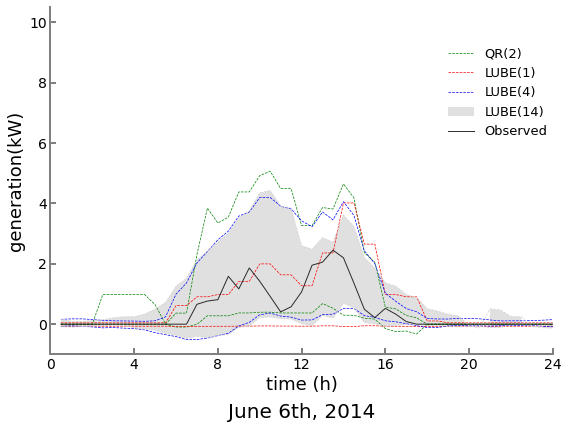

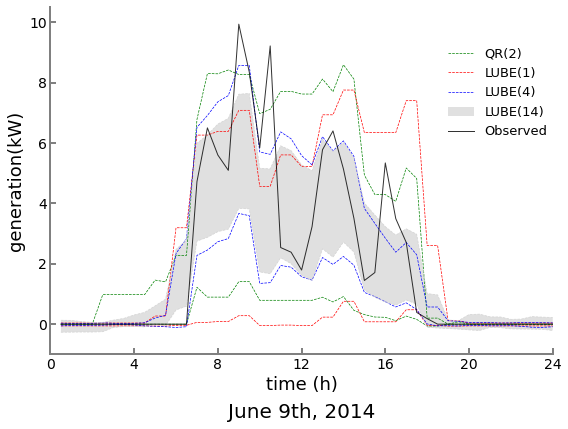

In [7]:
plot_PIs(6)
plot_PIs(9)